#### Load libraries and read in data 

In [507]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
listings = pd.read_csv('./listings.csv')
listings.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,Maija,...,10.0,10.0,9.0,10.0,f,moderate,f,w',2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,Andrea,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,9851441,Emily,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,1452570,Emily,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


Use open-ended string variable to derive whether or not there is close public transportation near Airbnb as an amenity. Create dummy variable for whether there is public transit nearby.
Also create dummy variables for certain amenities that listing may have.

In [427]:
listings['transit_binary']= np.where(listings.transit.str.contains("bus"), 1, 
                            np.where(listings.transit.str.contains("train"), 1,
                            np.where(listings.transit.str.contains("public"), 1,
                            np.where(listings.transit.str.contains("transit"), 1,
                            np.where(listings.transit.str.contains("transport"), 1,
                            np.where(listings.transit.str.contains("transportation"), 1,0
                                    ))))))
listings['transit_missing']=listings.transit.isnull().map({True:0, False:1})
listings['transit_dummy']=listings['transit_missing']*listings['transit_binary']

In [104]:
listings[['transit','transit_binary','transit_missing','transit_dummy']]

,transit,transit_binary,transit_missing,transit_dummy
0,NaN,1,0,0
1,"Convenient bus stops are just down the block, ...",1,1,1
2,A bus stop is just 2 blocks away. Easy bus a...,1,1,1
3,NaN,1,0,0
4,The nearest public transit bus (D Line) is 2 b...,1,1,1
...,...,...,...,...
3813,NaN,1,0,0
3814,Uber and Car2go are good options in Seattle. T...,1,1,1
3815,NaN,1,0,0
3816,Yes,0,1,0


In [ ]:
df['family_friendly']= np.where(df.amenities.str.contains("Family/Kid Friendly"), 1,0) 
df['pet_friendly']= np.where(df.amenities.str.contains("Pets Allowed"), 1,0)
df['gym']= np.where(df.amenities.str.contains("Gym"), 1,0)
df['hot_tub']= np.where(df.amenities.str.contains("Hot Tub"), 1,0)
df['washer']= np.where(df.amenities.str.contains("Washer"), 1,0)
df['dryer']= np.where(df.amenities.str.contains("Dryer"), 1,0)
df['parking']= np.where(df.amenities.str.contains("Free Parking on Premises"), 1,0)
df['internet']= np.where(df.amenities.str.contains("Internet"), 1,0)
df['fireplace']= np.where(df.amenities.str.contains("Indoor Fireplace"), 1,0)

Transform categorical variables into dummy variables. Also create new dummy variables for binary T/F existing variables.

In [225]:
df = pd.get_dummies(listings, columns = ['neighbourhood', 'property_type', 'room_type', 'bed_type', 'host_response_time', 'cancellation_policy'], prefix_sep='_', dummy_na = False)

In [226]:
df.loc[df['host_is_superhost'] == 't', 'superhost'] = 1
df.loc[df['host_is_superhost'] == 'f', 'superhost'] = 0 
df.loc[df['host_has_profile_pic'] == 't', 'host_pic'] = 1
df.loc[df['host_has_profile_pic'] == 'f', 'host_pic'] = 0 
df.loc[df['host_identity_verified'] == 't', 'host_verified'] = 1
df.loc[df['host_identity_verified'] == 'f', 'host_verified'] = 0 

Clean data such that numeric variables with characters that are not understood (e.g., $ or %) are removed, and the string variables are changed to numeric.

In [227]:
df['extra_people_str']=df['extra_people'].str.replace('$',"").astype(float)
df['daily_price']=df['price'].str.replace('$',"")
df['daily_price']=df['daily_price'].str.replace(',',"").astype(float)
df['host_response_rate']=df['host_response_rate'].str.replace('%',"").astype(float)
df['host_acceptance_rate']=df['host_acceptance_rate'].str.replace('%',"").astype(float)

/var/folders/0y/t1fyf8fd18z4fjv5qqsxhs2c0000gn/T/ipykernel_1055/234923330.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['extra_people_str']=df['extra_people'].str.replace('$',"").astype(float)
/var/folders/0y/t1fyf8fd18z4fjv5qqsxhs2c0000gn/T/ipykernel_1055/234923330.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['daily_price']=df['price'].str.replace('$',"")


Create dummy variable from a numeric variable.

In [228]:
df['extra_guest_fee'] = df['extra_people_str'].apply(lambda x: 0 if x==0.0 else 1)
df['extra_guest_fee']

0       1
1       0
2       1
3       0
4       1
       ..
3813    0
3814    1
3815    1
3816    0
3817    0
Name: extra_guest_fee, Length: 3818, dtype: int64

In [478]:
df['perfect_rating'] = df['review_scores_rating'].apply(lambda x: 1 if x==100 else 0)
df['perfect_rating']

0       0
1       0
2       0
3       0
4       0
       ..
3813    0
3814    1
3815    0
3816    0
3817    0
Name: perfect_rating, Length: 3818, dtype: int64

Check which variables have missing values, and how large the proportion of missing values is.

In [229]:
np.sum(df.isnull())/len(df)

id                  0.000000
name                0.000000
summary             0.046359
space               0.149031
description         0.000000
                      ...   
host_pic            0.000524
host_verified       0.000524
extra_people_str    0.000000
daily_price         0.000000
extra_guest_fee     0.000000
Length: 192, dtype: float64

Create separate dataframes with variables that I believe are most relevant to answering the questions that I have outlined. Divide these dataframes into X and y datasets for testing.
<br> Q1: What impacts price of Airbnb listing?
<br> Q2: What impacts the score rating of Airbnb listing?
<br> Q3: What influences whether host is 'superhost'?

In [479]:
X1 = df[['accommodates','bathrooms','bedrooms','beds','guests_included','number_of_reviews','review_scores_rating',
 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
 'review_scores_location','review_scores_value','reviews_per_month','transit_dummy','neighbourhood_Alki',
 'neighbourhood_Arbor Heights','neighbourhood_Atlantic','neighbourhood_Ballard','neighbourhood_Belltown',
 'neighbourhood_Bitter Lake','neighbourhood_Brighton','neighbourhood_Broadview','neighbourhood_Broadway',
 'neighbourhood_Bryant','neighbourhood_Capitol Hill','neighbourhood_Cedar Park','neighbourhood_Central Business District',
 'neighbourhood_Columbia City','neighbourhood_Crown Hill','neighbourhood_Dunlap','neighbourhood_Eastlake',
 'neighbourhood_Fairmount Park','neighbourhood_Fauntleroy','neighbourhood_First Hill','neighbourhood_Fremont',
 'neighbourhood_Gatewood','neighbourhood_Genesee','neighbourhood_Georgetown','neighbourhood_Green Lake',
 'neighbourhood_Greenwood','neighbourhood_Haller Lake','neighbourhood_Harrison/Denny-Blaine','neighbourhood_High Point',
 'neighbourhood_Highland Park','neighbourhood_Holly Park','neighbourhood_Industrial District','neighbourhood_Interbay',
 'neighbourhood_International District','neighbourhood_Laurelhurst','neighbourhood_Leschi','neighbourhood_Licton Springs',
 'neighbourhood_Lower Queen Anne','neighbourhood_Madison Park','neighbourhood_Madrona','neighbourhood_Magnolia',
 'neighbourhood_Maple Leaf','neighbourhood_Mathews Beach','neighbourhood_Meadowbrook','neighbourhood_Minor',
 'neighbourhood_Montlake','neighbourhood_Mount Baker','neighbourhood_North Admiral','neighbourhood_North Beach/Blue Ridge',
 'neighbourhood_North Beacon Hill','neighbourhood_North College Park','neighbourhood_North Delridge','neighbourhood_Olympic Hills',
 'neighbourhood_Phinney Ridge','neighbourhood_Pike Market','neighbourhood_Pike Place Market','neighbourhood_Pinehurst',
 'neighbourhood_Pioneer Square','neighbourhood_Portage Bay','neighbourhood_Queen Anne','neighbourhood_Rainier Beach',
 'neighbourhood_Ravenna','neighbourhood_Riverview','neighbourhood_Roosevelt','neighbourhood_Roxhill','neighbourhood_Seaview',
 'neighbourhood_Seward Park','neighbourhood_South Beacon Hill','neighbourhood_South Delridge','neighbourhood_South Lake Union',
 'neighbourhood_South Park','neighbourhood_Stevens','neighbourhood_The Junction','neighbourhood_University District',
 'neighbourhood_Victory Heights','neighbourhood_View Ridge','neighbourhood_Wallingford','neighbourhood_Wedgewood',
 'neighbourhood_Westlake','neighbourhood_Windermere','neighbourhood_Yesler Terrace',
 'property_type_Apartment','property_type_Bed & Breakfast','property_type_Boat','property_type_Bungalow',
 'property_type_Cabin','property_type_Camper/RV','property_type_Chalet','property_type_Condominium','property_type_Dorm',
 'property_type_House','property_type_Loft','property_type_Other','property_type_Tent','property_type_Townhouse',
 'property_type_Treehouse','property_type_Yurt',
 'room_type_Entire home/apt','room_type_Private room','room_type_Shared room',
 'bed_type_Airbed','bed_type_Couch','bed_type_Futon','bed_type_Pull-out Sofa','bed_type_Real Bed',
 'superhost','availability_30', 'extra_guest_fee', 'family_friendly', 'pet_friendly', 'gym', 'hot_tub',
 'washer', 'dryer', 'parking', 'internet', 'fireplace', 'daily_price']]

X2 = df[['host_response_rate','host_acceptance_rate','accommodates','bathrooms','bedrooms',
 'beds','guests_included','minimum_nights','availability_30','number_of_reviews','transit_dummy','neighbourhood_Alki',
 'neighbourhood_Arbor Heights','neighbourhood_Atlantic','neighbourhood_Ballard','neighbourhood_Belltown',
 'neighbourhood_Bitter Lake','neighbourhood_Brighton','neighbourhood_Broadview','neighbourhood_Broadway',
 'neighbourhood_Bryant','neighbourhood_Capitol Hill','neighbourhood_Cedar Park','neighbourhood_Central Business District',
 'neighbourhood_Columbia City','neighbourhood_Crown Hill','neighbourhood_Dunlap','neighbourhood_Eastlake',
 'neighbourhood_Fairmount Park','neighbourhood_Fauntleroy','neighbourhood_First Hill','neighbourhood_Fremont',
 'neighbourhood_Gatewood','neighbourhood_Genesee','neighbourhood_Georgetown','neighbourhood_Green Lake',
 'neighbourhood_Greenwood','neighbourhood_Haller Lake','neighbourhood_Harrison/Denny-Blaine','neighbourhood_High Point',
 'neighbourhood_Highland Park','neighbourhood_Holly Park','neighbourhood_Industrial District','neighbourhood_Interbay',
 'neighbourhood_International District','neighbourhood_Laurelhurst','neighbourhood_Leschi','neighbourhood_Licton Springs',
 'neighbourhood_Lower Queen Anne','neighbourhood_Madison Park','neighbourhood_Madrona','neighbourhood_Magnolia',
 'neighbourhood_Maple Leaf','neighbourhood_Mathews Beach','neighbourhood_Meadowbrook','neighbourhood_Minor',
 'neighbourhood_Montlake','neighbourhood_Mount Baker','neighbourhood_North Admiral','neighbourhood_North Beach/Blue Ridge',
 'neighbourhood_North Beacon Hill','neighbourhood_North College Park','neighbourhood_North Delridge','neighbourhood_Olympic Hills',
 'neighbourhood_Phinney Ridge','neighbourhood_Pike Market','neighbourhood_Pike Place Market','neighbourhood_Pinehurst',
 'neighbourhood_Pioneer Square','neighbourhood_Portage Bay','neighbourhood_Queen Anne','neighbourhood_Rainier Beach',
 'neighbourhood_Ravenna','neighbourhood_Riverview','neighbourhood_Roosevelt','neighbourhood_Roxhill','neighbourhood_Seaview',
 'neighbourhood_Seward Park','neighbourhood_South Beacon Hill','neighbourhood_South Delridge','neighbourhood_South Lake Union',
 'neighbourhood_South Park','neighbourhood_Stevens','neighbourhood_The Junction','neighbourhood_University District',
 'neighbourhood_Victory Heights','neighbourhood_View Ridge','neighbourhood_Wallingford','neighbourhood_Wedgewood',
 'neighbourhood_Westlake','neighbourhood_Windermere','neighbourhood_Yesler Terrace',
 'property_type_Apartment','property_type_Bed & Breakfast','property_type_Boat','property_type_Bungalow',
 'property_type_Cabin','property_type_Camper/RV','property_type_Chalet','property_type_Condominium','property_type_Dorm',
 'property_type_House','property_type_Loft','property_type_Other','property_type_Tent','property_type_Townhouse',
 'property_type_Treehouse','property_type_Yurt',
 'room_type_Entire home/apt','room_type_Private room','room_type_Shared room',
 'bed_type_Airbed','bed_type_Couch','bed_type_Futon','bed_type_Pull-out Sofa','bed_type_Real Bed',
 'host_response_time_a few days or more','host_response_time_within a day','host_response_time_within a few hours',
 'host_response_time_within an hour',
 'cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict',
 'host_pic','host_verified','extra_guest_fee', 'family_friendly', 'pet_friendly', 'gym', 'hot_tub',
 'washer', 'dryer', 'parking', 'internet', 'fireplace', 'daily_price', 'review_scores_rating', 'perfect_rating']]

X3 = df[['host_response_rate','host_acceptance_rate','host_listings_count','minimum_nights','availability_30',
 'accommodates', 'number_of_reviews','review_scores_rating',
 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
 'review_scores_location','review_scores_value','reviews_per_month','neighbourhood_Alki',
 'neighbourhood_Arbor Heights','neighbourhood_Atlantic','neighbourhood_Ballard','neighbourhood_Belltown',
 'neighbourhood_Bitter Lake','neighbourhood_Brighton','neighbourhood_Broadview','neighbourhood_Broadway',
 'neighbourhood_Bryant','neighbourhood_Capitol Hill','neighbourhood_Cedar Park','neighbourhood_Central Business District',
 'neighbourhood_Columbia City','neighbourhood_Crown Hill','neighbourhood_Dunlap','neighbourhood_Eastlake',
 'neighbourhood_Fairmount Park','neighbourhood_Fauntleroy','neighbourhood_First Hill','neighbourhood_Fremont',
 'neighbourhood_Gatewood','neighbourhood_Genesee','neighbourhood_Georgetown','neighbourhood_Green Lake',
 'neighbourhood_Greenwood','neighbourhood_Haller Lake','neighbourhood_Harrison/Denny-Blaine','neighbourhood_High Point',
 'neighbourhood_Highland Park','neighbourhood_Holly Park','neighbourhood_Industrial District','neighbourhood_Interbay',
 'neighbourhood_International District','neighbourhood_Laurelhurst','neighbourhood_Leschi','neighbourhood_Licton Springs',
 'neighbourhood_Lower Queen Anne','neighbourhood_Madison Park','neighbourhood_Madrona','neighbourhood_Magnolia',
 'neighbourhood_Maple Leaf','neighbourhood_Mathews Beach','neighbourhood_Meadowbrook','neighbourhood_Minor',
 'neighbourhood_Montlake','neighbourhood_Mount Baker','neighbourhood_North Admiral','neighbourhood_North Beach/Blue Ridge',
 'neighbourhood_North Beacon Hill','neighbourhood_North College Park','neighbourhood_North Delridge','neighbourhood_Olympic Hills',
 'neighbourhood_Phinney Ridge','neighbourhood_Pike Market','neighbourhood_Pike Place Market','neighbourhood_Pinehurst',
 'neighbourhood_Pioneer Square','neighbourhood_Portage Bay','neighbourhood_Queen Anne','neighbourhood_Rainier Beach',
 'neighbourhood_Ravenna','neighbourhood_Riverview','neighbourhood_Roosevelt','neighbourhood_Roxhill','neighbourhood_Seaview',
 'neighbourhood_Seward Park','neighbourhood_South Beacon Hill','neighbourhood_South Delridge','neighbourhood_South Lake Union',
 'neighbourhood_South Park','neighbourhood_Stevens','neighbourhood_The Junction','neighbourhood_University District',
 'neighbourhood_Victory Heights','neighbourhood_View Ridge','neighbourhood_Wallingford','neighbourhood_Wedgewood',
 'neighbourhood_Westlake','neighbourhood_Windermere','neighbourhood_Yesler Terrace',
 'property_type_Apartment','property_type_Bed & Breakfast','property_type_Boat','property_type_Bungalow',
 'property_type_Cabin','property_type_Camper/RV','property_type_Chalet','property_type_Condominium','property_type_Dorm',
 'property_type_House','property_type_Loft','property_type_Other','property_type_Tent','property_type_Townhouse',
 'property_type_Treehouse','property_type_Yurt',
 'room_type_Entire home/apt','room_type_Private room','room_type_Shared room',
 'host_response_time_a few days or more','host_response_time_within a day','host_response_time_within a few hours',
 'host_response_time_within an hour',
 'cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict',
 'host_pic','host_verified','extra_guest_fee', 'superhost']]

In [480]:
X1_2 = X1[~np.isnan(X1).any(axis=1)]
X2_2 = X2[~np.isnan(X2).any(axis=1)]
X3_2 = X3[~np.isnan(X3).any(axis=1)]

In [481]:
y1 = X1_2['daily_price']
y2 = X2_2['perfect_rating']
y3 = X3_2['superhost']

(array([3.62567369e-03, 7.87849094e-03, 7.60411563e-03, 4.82116610e-03,
        2.11660951e-03, 1.52866242e-03, 1.26408623e-03, 3.52768251e-04,
        4.21362077e-04, 2.15580598e-04, 3.33170015e-04, 1.07790299e-04,
        6.85938266e-05, 9.79911808e-05, 8.81920627e-05, 9.79911808e-06,
        6.85938266e-05, 3.91964723e-05, 0.00000000e+00, 9.79911808e-06,
        2.93973542e-05, 0.00000000e+00, 2.93973542e-05, 9.79911808e-06,
        0.00000000e+00, 0.00000000e+00, 9.79911808e-06, 0.00000000e+00,
        9.79911808e-06, 2.93973542e-05]),
 array([  25. ,   57.5,   90. ,  122.5,  155. ,  187.5,  220. ,  252.5,
         285. ,  317.5,  350. ,  382.5,  415. ,  447.5,  480. ,  512.5,
         545. ,  577.5,  610. ,  642.5,  675. ,  707.5,  740. ,  772.5,
         805. ,  837.5,  870. ,  902.5,  935. ,  967.5, 1000. ]),
 <BarContainer object of 30 artists>)

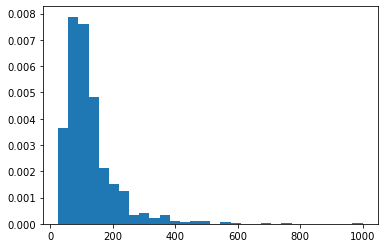

In [482]:
plt.hist(y1, density=True, bins=30)  

(array([23.26691729,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  6.73308271]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

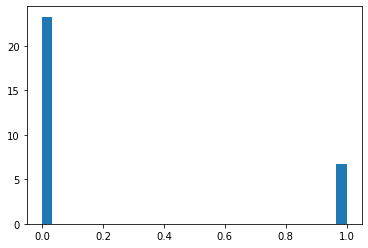

In [483]:
plt.hist(y2, density=True, bins=30)  

In [484]:
y2.mean()

0.2244360902255639

(array([22.15488215,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  7.84511785]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

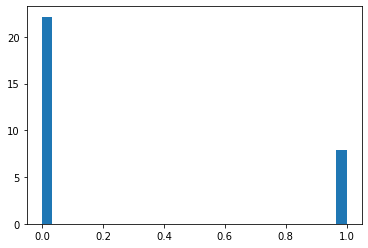

In [485]:
plt.hist(y3, density=True, bins=30)  

In [486]:
y3.mean()

0.2615039281705948

In [487]:
X1_full = X1_2.drop(['daily_price'], axis = 1)
X2_full = X2_2.drop(['review_scores_rating'], axis = 1)
X2_full = X2_full.drop(['perfect_rating'], axis = 1)
X3_full = X3_2.drop(['superhost'], axis = 1)

In [488]:
X1_full.shape
X2_full.shape
X3_full.shape

(2673, 125)

Make use of two functions that were defined for Udacity Data Scientist course (*find_optimal_lm_mod* and *coef_weights*) in order to run optimal regression model for each question and derive coefficients of most impactful variables.

##### *Question 1* 

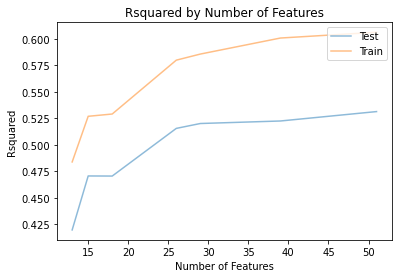

In [489]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression()
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

# Q1
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 500, 100, 50]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X1_full, y1, cutoffs)

In [490]:
# Cell for your computations to answer the next question
print(X_train.shape[1]) #Number of columns
print(X_test.shape[1]) #Number of columns

print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_train)]) # The model we should implement train_r2

51
51
0.5313664328192437
0.6062999204529695


In [491]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
26,neighbourhood_Queen Anne,38.713100,38.713100
34,room_type_Entire home/apt,36.685259,36.685259
36,room_type_Shared room,-35.325294,35.325294
2,bedrooms,28.959077,28.959077
23,neighbourhood_Lower Queen Anne,26.951614,26.951614
1,bathrooms,26.651281,26.651281
22,neighbourhood_Greenwood,-21.306360,21.306360
16,neighbourhood_Belltown,20.240684,20.240684
20,neighbourhood_First Hill,17.494900,17.494900
17,neighbourhood_Capitol Hill,16.690856,16.690856


##### *Question 2*

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

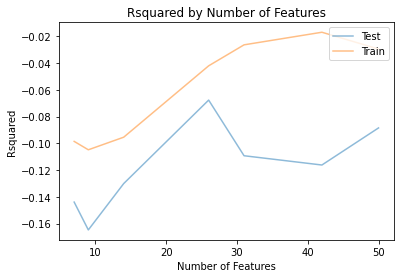

In [495]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LogisticRegression()
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

# Q2
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 500, 100, 50]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X2_full, y2, cutoffs)

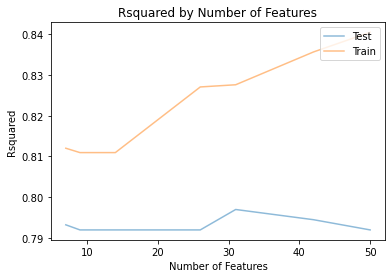

In [511]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LogisticRegression(solver='lbfgs', max_iter=10000)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(accuracy_score(y_test, y_test_preds))
        r2_scores_train.append(accuracy_score(y_train, y_train_preds))
        results[str(cutoff)] = accuracy_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LogisticRegression(solver='lbfgs', max_iter=10000)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

# Q2
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 500, 100, 50]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X2_full, y2, cutoffs)

In [529]:
X_train, X_test, y_train, y_test = train_test_split(X2_full, y2, test_size = .30, random_state=42)
lm_model = LogisticRegression(solver='lbfgs', max_iter=10000)
lm_model.fit(X_train, y_train)
y_pred=lm_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7957393483709273

In [512]:
# Cell for your computations to answer the next question
print(X_train.shape[1]) #Number of columns
print(X_test.shape[1]) #Number of columns

print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_train)]) # The model we should implement train_r2

31
31
0.7969924812030075
0.8404940923737916


In [523]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = np.transpose(lm_model.coef_)
    coefs_df['abs_coefs'] = np.abs(np.transpose(lm_model.coef_))
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
21,host_pic,0.791480,0.791480
26,dryer,0.519785,0.519785
18,cancellation_policy_flexible,0.513252,0.513252
11,property_type_Apartment,0.363498,0.363498
15,bed_type_Real Bed,0.321356,0.321356
14,room_type_Private room,0.306133,0.306133
25,washer,-0.260044,0.260044
17,host_response_time_within an hour,0.247724,0.247724
27,parking,0.245414,0.245414
22,host_verified,0.233366,0.233366


##### *Question 3*

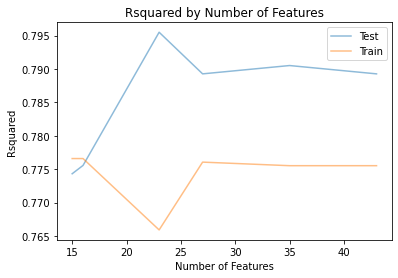

In [524]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LogisticRegression(solver='lbfgs', max_iter=10000)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(accuracy_score(y_test, y_test_preds))
        r2_scores_train.append(accuracy_score(y_train, y_train_preds))
        results[str(cutoff)] = accuracy_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LogisticRegression(solver='lbfgs', max_iter=10000)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

# Q2
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 500, 100, 50]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X3_full, y3, cutoffs)

In [530]:
X_train, X_test, y_train, y_test = train_test_split(X3_full, y3, test_size = .30, random_state=42)
lm_model = LogisticRegression(solver='lbfgs', max_iter=10000)
lm_model.fit(X_train, y_train)
y_pred=lm_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7917705735660848

In [531]:
# Cell for your computations to answer the next question
print(X_train.shape[1]) #Number of columns
print(X_test.shape[1]) #Number of columns

print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_train)]) # The model we should implement train_r2

125
125
0.7955112219451371
0.7765900587920898


In [526]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = np.transpose(lm_model.coef_)
    coefs_df['abs_coefs'] = np.abs(np.transpose(lm_model.coef_))
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
21,host_verified,0.697541,0.697541
9,review_scores_cleanliness,0.624767,0.624767
20,host_pic,-0.540486,0.540486
11,review_scores_communication,0.499128,0.499128
8,review_scores_accuracy,0.400231,0.400231
10,review_scores_checkin,0.397863,0.397863
19,cancellation_policy_strict,0.390196,0.390196
13,review_scores_value,0.241842,0.241842
22,extra_guest_fee,0.236828,0.236828
16,property_type_House,0.200208,0.200208
